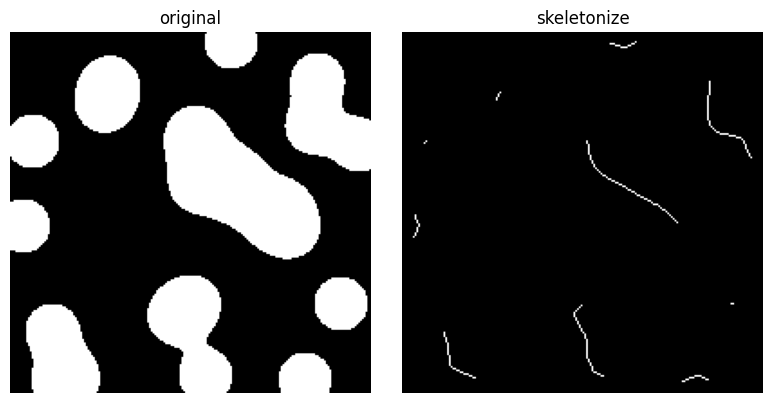

In [1]:
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage import data

blobs = data.binary_blobs(200, blob_size_fraction=0.2, volume_fraction=0.35, rng=1)

skeleton = skeletonize(blobs)

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeletonize')
ax[1].axis('off')


fig.tight_layout()
plt.show()

## INFO

In [5]:
from skan import Skeleton, summarize

bd_skeleton = summarize(Skeleton(skeleton))
bd_skeleton.head()

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,0,0,1,16.071068,0,1.0,0.0,5,129,6,115,5,129,6,115,14.035669
1,1,15,84,58.213203,0,1.0,0.0,27,170,69,193,27,170,69,193,47.885280
2,2,21,29,4.828427,0,1.0,0.0,33,54,37,52,33,54,37,52,4.472136
3,3,63,66,1.414214,0,1.0,0.0,60,13,61,12,60,13,61,12,1.414214
4,4,64,140,74.497475,0,1.0,0.0,60,102,105,152,60,102,105,152,67.268120


In [7]:
# Get basic info about the data
print(bd_skeleton.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   skeleton-id         10 non-null     int32  
 1   node-id-src         10 non-null     int32  
 2   node-id-dst         10 non-null     int32  
 3   branch-distance     10 non-null     float64
 4   branch-type         10 non-null     int32  
 5   mean-pixel-value    10 non-null     float64
 6   stdev-pixel-value   10 non-null     float64
 7   image-coord-src-0   10 non-null     int64  
 8   image-coord-src-1   10 non-null     int64  
 9   image-coord-dst-0   10 non-null     int64  
 10  image-coord-dst-1   10 non-null     int64  
 11  coord-src-0         10 non-null     int64  
 12  coord-src-1         10 non-null     int64  
 13  coord-dst-0         10 non-null     int64  
 14  coord-dst-1         10 non-null     int64  
 15  euclidean-distance  10 non-null     float64
dtypes: float64(

In [8]:
# Describe numerical statistics
print(bd_skeleton.describe())

       skeleton-id  node-id-src  node-id-dst  branch-distance  branch-type  \
count     10.00000    10.000000    10.000000        10.000000         10.0   
mean       4.50000    99.900000   131.200000        27.135029          0.0   
std        3.02765    78.719544    84.852552        25.879540          0.0   
min        0.00000     0.000000     1.000000         1.000000          0.0   
25%        2.25000    31.500000    70.500000         7.139087          0.0   
50%        4.50000    97.500000   144.000000        16.071068          0.0   
75%        6.75000   150.500000   205.500000        45.816757          0.0   
max        9.00000   239.000000   240.000000        74.497475          0.0   

       mean-pixel-value  stdev-pixel-value  image-coord-src-0  \
count              10.0               10.0          10.000000   
mean                1.0                0.0          94.500000   
std                 0.0                0.0          66.384821   
min                 1.0              

## Delete

Branch lengths before filtering:
0    16.071068
1    58.213203
2     4.828427
3     1.414214
4    74.497475
5    14.071068
6     1.000000
7    49.041631
8    36.142136
9    16.071068
Name: branch-distance, dtype: float64


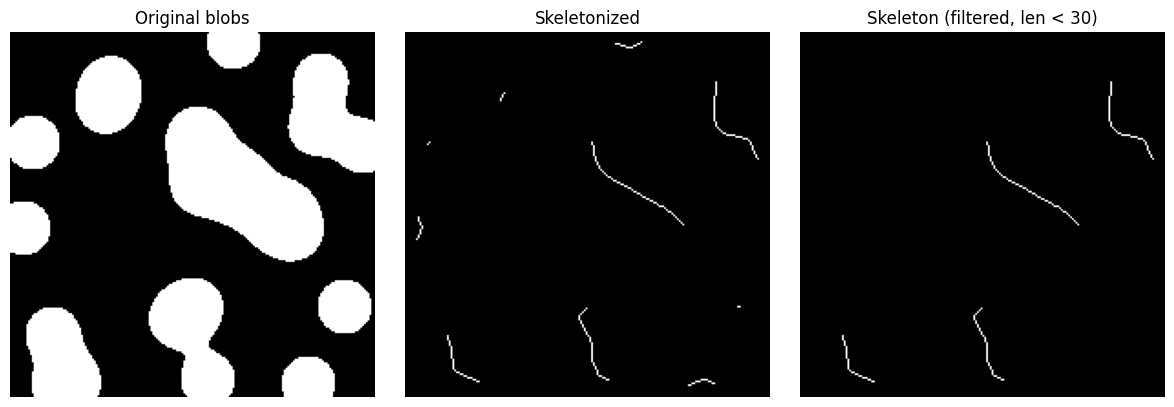

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage import data
from skan import Skeleton, summarize

# Generate binary blobs and skeletonize them
blobs = data.binary_blobs(200, blob_size_fraction=0.2, volume_fraction=0.35, rng=1)
skeleton = skeletonize(blobs)

# Summarize the skeleton using skan
skel = Skeleton(skeleton)
branch_data = summarize(skel)

# Print the branch lengths before filtering
print(f"Branch lengths before filtering:\n{branch_data['branch-distance']}")

# Set the length threshold (adjust this value based on your needs)
length_threshold = 30  # Minimum length of a branch to keep


# Get branches to delete based on the length threshold
branches_to_delete = branch_data[branch_data['branch-distance'] < length_threshold].index.tolist()

# Remove branches that are shorter than the threshold
for branch_id in branches_to_delete:
    # Get the coordinates of each branch to delete
    coordinates = skel.path_coordinates(branch_id)
    
    # Set the corresponding pixels in the skeleton to False (or 0)
    for coord in coordinates:
        skeleton[tuple(np.round(coord).astype(int))] = False  # Ensure coordinates are integers

# Plot the original blobs and the modified skeleton
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('Original blobs')
ax[0].axis('off')

ax[1].imshow(skeletonize(blobs), cmap=plt.cm.gray)
ax[1].set_title('Skeletonized')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title(f'Skeleton (filtered, len < {length_threshold})')
ax[2].axis('off')

fig.tight_layout()
plt.show()
